In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#import dataframe of all unit and all period with sales and average daily cost
df = pd.read_csv('data/BenchmarkingSample20230607_with_features.csv')
df

,Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,...,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
0,00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,...,22747,67205,7898,30645,34531,32674,22747,9927,15.003333,2060.983333
1,00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,...,22934,67660,9330,32264,29278,38382,22934,15448,15.003333,1831.933333
2,00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,...,21822,60087,8033,29855,27747,32340,21822,10518,15.003333,1801.663333
3,00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,...,23055,64363,49056,72111,71261,-6898,23055,-29953,15.003333,3182.123333
4,00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,...,23669,67440,42535,66204,64950,2490,23669,-21179,15.003333,2956.193333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,2022-11-30,30,20,15729,99236,10557,75243,8789,3997,...,109793,264704,94918,204711,139868,124836,109793,15043,2175.308333,10862.118333
212,0004030BEB57,2022-12-31,31,21,12227,108507,13137,94509,1704,4989,...,121644,303041,114744,236388,156370,146671,121644,25027,2175.308333,12018.358333
213,0004030BEB57,2023-01-31,31,22,15255,101713,10812,82894,3256,4278,...,112525,250680,103340,215865,148349,102331,112525,-10194,2175.308333,11006.238333
214,0004030BEB57,2023-02-28,28,23,15020,98547,11558,83338,3605,5253,...,110105,247506,105045,215150,141023,106483,110105,-3622,2175.308333,11607.698333


In [3]:
pd.set_option('display.max_rows', None)  # Show all rows without truncation
print(df['Adjusted daily Rent'])

0        15.003333
1        15.003333
2        15.003333
3        15.003333
4        15.003333
5        15.003333
6        15.003333
7        15.003333
8        15.003333
9        15.003333
10       15.003333
11       15.003333
12       15.003333
13       15.003333
14       15.003333
15       15.003333
16       15.003333
17       15.003333
18       15.003333
19       15.003333
20       15.003333
21       15.003333
22       15.003333
23       15.003333
24      861.671667
25      861.671667
26      861.671667
27      861.671667
28      861.671667
29      861.671667
30      861.671667
31      861.671667
32      861.671667
33      861.671667
34      861.671667
35      861.671667
36      861.671667
37      861.671667
38      861.671667
39      861.671667
40      861.671667
41      861.671667
42      861.671667
43      861.671667
44      861.671667
45      861.671667
46      861.671667
47      861.671667
48       84.550000
49       84.550000
50       84.550000
51       84.550000
52       84.

<Axes: xlabel='Rent', ylabel='Sales'>

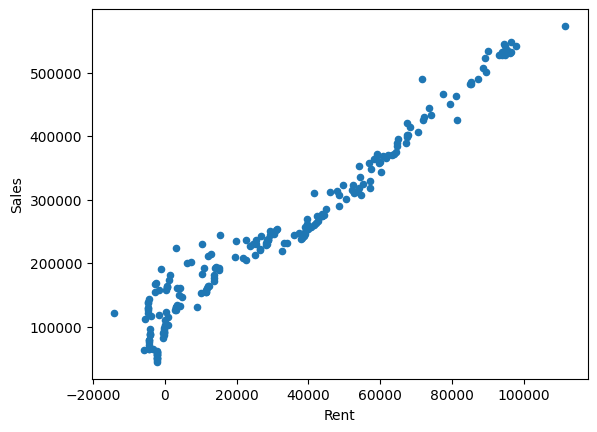

In [4]:
df.plot.scatter(x = 'Rent', y = 'Sales')

In [5]:
y = df['Average daily Rent']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [6]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [7]:
fitted_model.params

const   -810.326653
Sales      0.007439
dtype: float64

In [8]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average daily Rent   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4453.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          3.25e-145
Time:                        23:24:42   Log-Likelihood:                -1474.3
No. Observations:                 216   AIC:                             2953.
Df Residuals:                     214   BIC:                             2959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -810.3267     31.536    -25.695      0.000    -872.488    -748.166
Sales          0.0074      0.000     66.732      0.000       0.007       0.008
==============================================================================
Omnibus:                       18.030   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.979
Skew:                          -0.716   Prob(JB):                     4.59e-05
Kurtosis:                       3.410   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df = df.drop('Average daily Rent', axis=1)
df

,Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,...,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
0,00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,...,22747,67205,7898,30645,34531,32674,22747,9927,15.003333,2060.983333
1,00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,...,22934,67660,9330,32264,29278,38382,22934,15448,15.003333,1831.933333
2,00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,...,21822,60087,8033,29855,27747,32340,21822,10518,15.003333,1801.663333
3,00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,...,23055,64363,49056,72111,71261,-6898,23055,-29953,15.003333,3182.123333
4,00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,...,23669,67440,42535,66204,64950,2490,23669,-21179,15.003333,2956.193333
5,00040302CD88,2021-09-30,30,6,3953,26257,3913,29863,5861,5416,...,30170,63947,41988,72158,65627,-1680,30170,-31850,15.003333,3334.653333
6,00040302CD88,2021-10-31,31,7,4275,25724,2832,31574,1379,4927,...,28556,73239,43373,71929,68876,4363,28556,-24193,15.003333,3262.183333
7,00040302CD88,2021-11-30,30,8,3864,23801,2578,27787,2599,5218,...,26379,65630,39144,65523,60585,5045,26379,-21334,15.003333,3031.423333
8,00040302CD88,2021-12-31,31,9,4082,23452,2686,31487,1611,5048,...,26138,71056,42888,69026,63434,7622,26138,-18516,15.003333,3024.903333
9,00040302CD88,2022-01-31,31,10,4268,27442,3181,29127,976,5197,...,30623,71001,41006,71629,63481,7520,30623,-23103,15.003333,3191.463333


In [10]:
df['Average Daily Cost'] = df.iloc[:, 18:].sum(axis=1)
df

,Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,...,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
0,00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,...,22747,67205,7898,30645,34531,32674,22747,9927,15.003333,2.326219e+05
1,00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,...,22934,67660,9330,32264,29278,38382,22934,15448,15.003333,2.420167e+05
2,00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,...,21822,60087,8033,29855,27747,32340,21822,10518,15.003333,2.159421e+05
3,00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,...,23055,64363,49056,72111,71261,-6898,23055,-29953,15.003333,2.725328e+05
4,00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,...,23669,67440,42535,66204,64950,2490,23669,-21179,15.003333,2.758140e+05
5,00040302CD88,2021-09-30,30,6,3953,26257,3913,29863,5861,5416,...,30170,63947,41988,72158,65627,-1680,30170,-31850,15.003333,2.773313e+05
6,00040302CD88,2021-10-31,31,7,4275,25724,2832,31574,1379,4927,...,28556,73239,43373,71929,68876,4363,28556,-24193,15.003333,3.013615e+05
7,00040302CD88,2021-11-30,30,8,3864,23801,2578,27787,2599,5218,...,26379,65630,39144,65523,60585,5045,26379,-21334,15.003333,2.735429e+05
8,00040302CD88,2021-12-31,31,9,4082,23452,2686,31487,1611,5048,...,26138,71056,42888,69026,63434,7622,26138,-18516,15.003333,2.939678e+05
9,00040302CD88,2022-01-31,31,10,4268,27442,3181,29127,976,5197,...,30623,71001,41006,71629,63481,7520,30623,-23103,15.003333,2.993009e+05


# Diagram and regression analysis for all the units for each time period

<Axes: xlabel='Sales', ylabel='Average Daily Cost'>

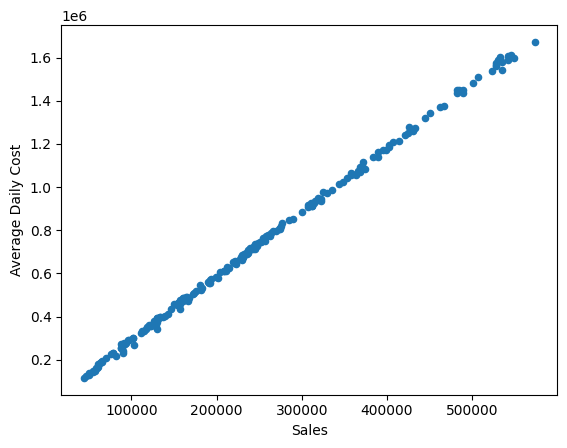

In [11]:
df.plot.scatter(x = 'Sales', y = 'Average Daily Cost')

In [12]:
import statsmodels.api as sm

In [13]:
y = df['Average Daily Cost']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [14]:
X.head()

,const,Sales
0,1.0,89952
1,1.0,90594
2,1.0,81909
3,1.0,87418
4,1.0,91109


In [15]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [16]:
fitted_model.params

const   -6191.212947
Sales       2.972979
dtype: float64

In [17]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average Daily Cost   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.130e+05
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:24:42   Log-Likelihood:                -2309.1
No. Observations:                 216   AIC:                             4622.
Df Residuals:                     214   BIC:                             4629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6191.2129   1503.469     -4.118      0.000   -9154.718   -3227.708
Sales          2.9730      0.005    559.430      0.000       2.963       2.983
==============================================================================
Omnibus:                       23.479   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.203
Skew:                          -0.692   Prob(JB):                     1.02e-07
Kurtosis:                       4.288   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# create dummy variables for the 8 locations 

In [18]:
# Assuming your data is stored in a DataFrame called 'df'
# Create dummy variables for the Unit column
dummy_units = pd.get_dummies(df['Unit'], prefix='Unit', drop_first=True)
dummy_units = dummy_units.astype(int)

In [19]:

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_units], axis=1)



In [20]:
# Define the independent and dependent variables
X = df[['Sales'] + list(dummy_units.columns)]
y = df['Average Daily Cost']


In [21]:

# Add a constant to the independent variables
X = sm.add_constant(X)
X


,const,Sales,Unit_00040302CE36,Unit_00040302CF03,Unit_00040302CF28,Unit_00040302D006,Unit_00040302D014,Unit_0004030A635E,Unit_0004030B92EE,Unit_0004030BEB57
0,1.0,89952,0,0,0,0,0,0,0,0
1,1.0,90594,0,0,0,0,0,0,0,0
2,1.0,81909,0,0,0,0,0,0,0,0
3,1.0,87418,0,0,0,0,0,0,0,0
4,1.0,91109,0,0,0,0,0,0,0,0
5,1.0,94117,0,0,0,0,0,0,0,0
6,1.0,101795,0,0,0,0,0,0,0,0
7,1.0,92009,0,0,0,0,0,0,0,0
8,1.0,97194,0,0,0,0,0,0,0,0
9,1.0,101624,0,0,0,0,0,0,0,0


In [22]:
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()


In [23]:
# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.584e+04
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          9.88e-324
Time:                        23:24:42   Log-Likelihood:                -2301.7
No. Observations:                 216   AIC:                             4623.
Df Residuals:                     206   BIC:                             4657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3649.2177   4236.93

# practical use 

In [24]:
#try rent against revenue, if it is not significant drop it 
#benchmark using the coefficicnet, see which one is above average and below average. 
#find other combination factor against net revenue 

/Users/aaditkamat/Desktop/Projects/QMB6945-RMS-Project/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

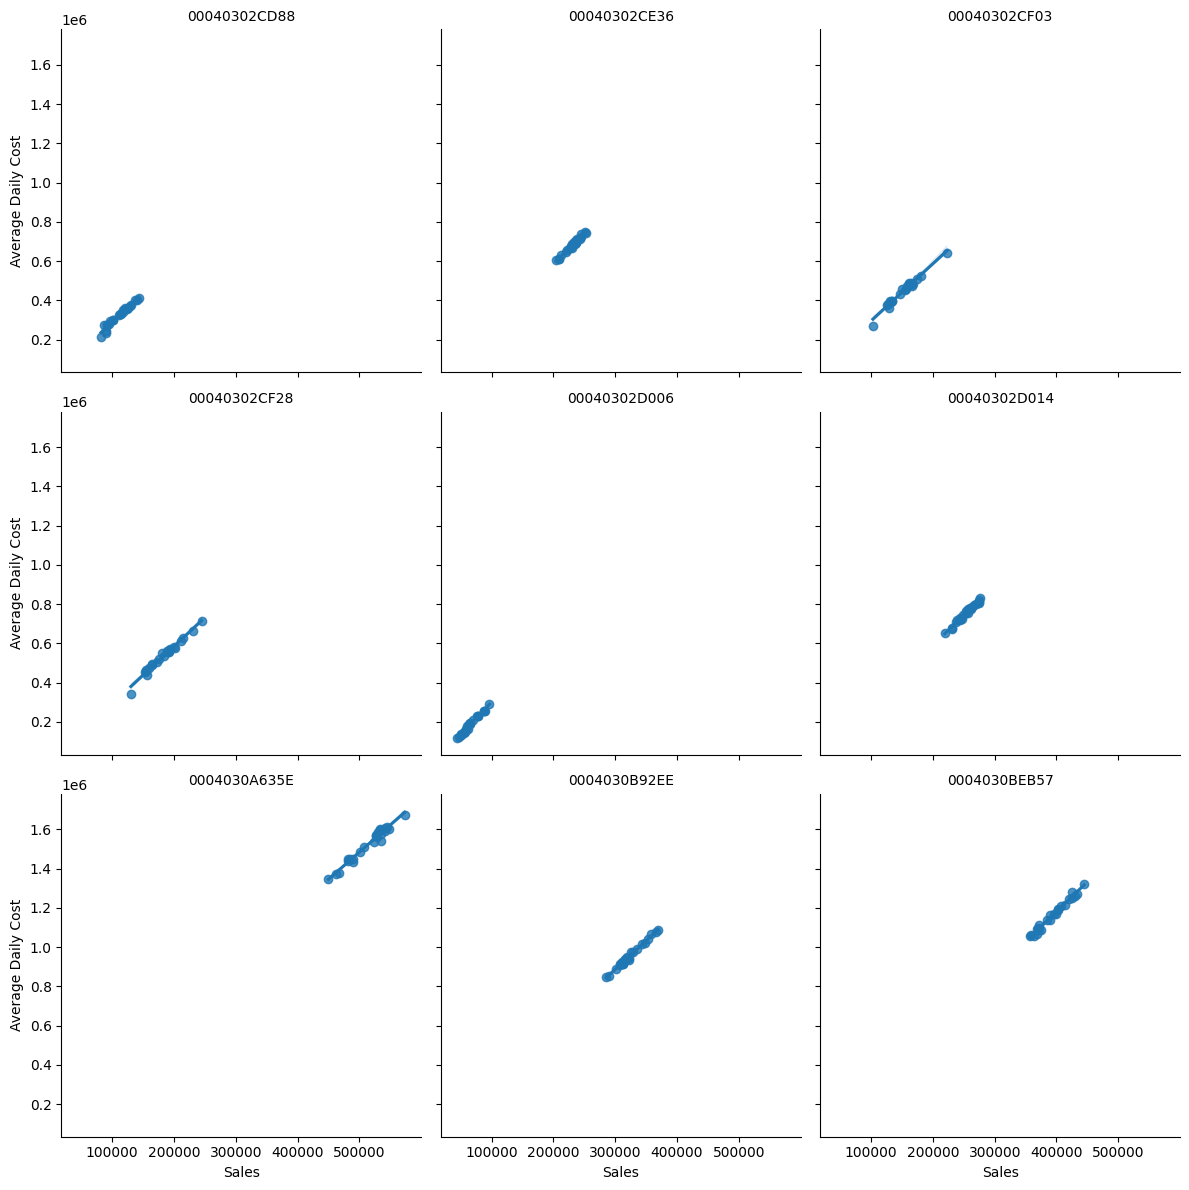

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create a regression plot for each unit
g = sns.lmplot(x="Sales", y="Average Daily Cost", col="Unit", data=df, col_wrap=3, height=4)

# Set the titles for the plots
g.set_titles("{col_name}")

# Display the plot
plt.show()

In [26]:
import statsmodels.api as sm

# Get the unique units
units = df['Unit'].unique()

# Create an empty dictionary to store the regression results
results = {}

# Iterate through each unit
for unit in units:
    # Filter the dataframe for the current unit
    df_unit = df[df['Unit'] == unit]

    # Define the dependent variable (Sales) and the independent variable (Average daily Rent)
    Y = df_unit['Average Daily Cost']
    X = df_unit['Sales']

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the Ordinary Least Squares (OLS) model
    model = sm.OLS(Y, X)

    # Get the results of the model
    result = model.fit()

    # Store the results in the dictionary
    results[unit] = result

# Print the summary of each regression
for unit, result in results.items():
    print(f"Regression Summary for Unit: {unit}")
    print(result.summary())
    print("\n---\n")

Regression Summary for Unit: 00040302CD88
                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     541.3
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           5.52e-17
Time:                        23:24:43   Log-Likelihood:                -256.45
No. Observations:                  24   AIC:                             516.9
Df Residuals:                      22   BIC:                             519.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

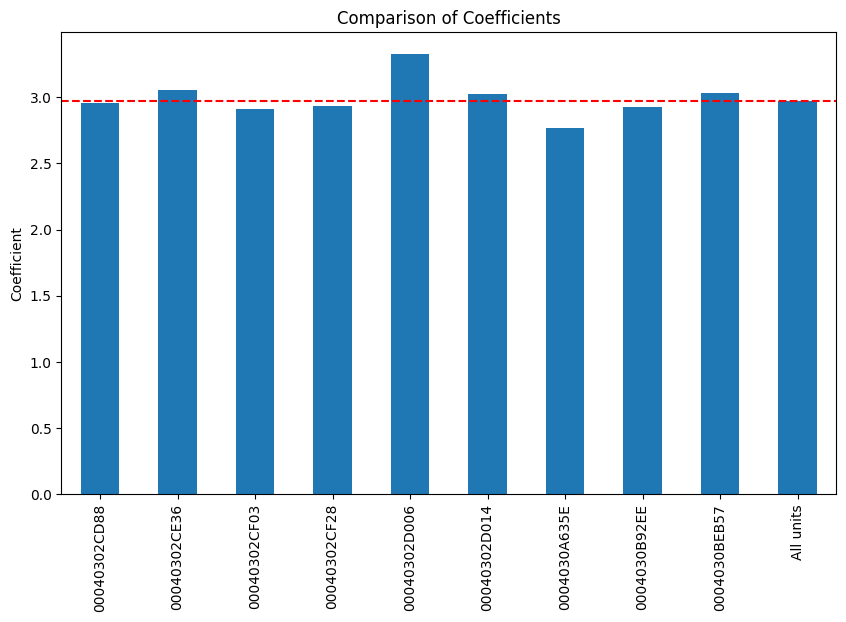

In [27]:
# Fit a linear regression model for all data points
Y_all = df['Average Daily Cost']
X_all = df['Sales']
X_all = sm.add_constant(X_all)
model_all = sm.OLS(Y_all, X_all)
result_all = model_all.fit()

# Get the coefficient from the model fitted on all data points
coef_all = result_all.params['Sales']

# Get the coefficients for each unit
coefs_units = {unit: result.params['Sales'] for unit, result in results.items()}

# Add the coefficient from the model fitted on all data points to the dictionary
coefs_units['All units'] = coef_all

# Convert the dictionary to a pandas Series for easy plotting
coef_series = pd.Series(coefs_units)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coef_series.plot(kind='bar')
plt.axhline(y=coef_all, color='r', linestyle='--')
plt.ylabel('Coefficient')
plt.title('Comparison of Coefficients')
plt.show()


In [28]:
#what about the ratio between coefficient and the intercept since the coefficient is proxy for variable cost and intercept could be the proxy of fixed cost.

In [29]:
#why the coefficient is useful, performance premium, predict one period out 